In [1]:
!pip install plotly
!pip install kneed
!pip install polars
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import json

In [3]:
df = pl.read_parquet("al_2month_export_v1.parquet")
df

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str
"""customer_event""","""product_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-AD58-4899-9F57-F43…","""64f91fde-f068-4527-afd9-7677df…"
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-3A7A-4516-5818-61D…","""64f91fde-f068-4527-afd9-7677df…"
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.327 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""e84daab0-8fa4-4c25-affa-08ab5b…","""abbottlyon""","""sh-8b8605c2-B865-4893-E01F-04C…","""e84daab0-8fa4-4c25-affa-08ab5b…"
"""customer_event""","""product_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1d-F1DF-494F-2BD5-90C…","""8dc27076-d2b4-4030-b02b-1c3733…"
"""customer_event""","""page_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1c-E85E-435B-0C90-2A2…","""8dc27076-d2b4-4030-b02b-1c3733…"
…,…,…,…,…,…,…,…,…,…
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.087 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/en-…","""Mozilla/5.0 (Linux; Android 15…","""68ED988F-97ac-46A9-a0a3-5cf13e…","""abbottlyon""","""sh-bb263d5f-38D6-46EE-BC92-3C2…","""68ED988F-97ac-46A9-a0a3-5cf13e…"
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.249 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/sear…","""Mozilla/5.0 (iPad; CPU OS 18_3…","""5662ef09-1949-458c-9859-0f3a25…","""abbottlyon""","""sh-bb2628ba-682F-4306-A5F4-6CF…","""5662ef09-1949-458c-9859-0f3a25…"
"""customer_event""","""page_viewed""",2025-03-21 23:59:55.190 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""AB93DF92-d914-4087-9ac0-d7e78f…","""abbottlyon""","""sh-bb262d37-1D4F-45FB-5BF4-2D4…","""AB93DF92-d914-4087-9ac0-d7e78f…"


In [4]:
df = df.drop_nulls()

In [5]:
def configure_geography(df):
    # Set geography based on shop column
    df = df.with_columns(
        geography=pl.when(pl.col("shop") == "abbott-lyon-global.myshopify.com")
        .then(pl.lit("Global"))
        .otherwise(pl.lit("US"))
        .cast(pl.Utf8)
    )
    
    return df


def configure_user_agent(df: pl.DataFrame) -> pl.DataFrame:
    # Extract OS family using vectorized string operations
    df = df.with_columns(
        device=pl.when(pl.col("user_agent").str.contains("iPhone|iPad|iOS"))
        .then(pl.lit("iOS"))
        .when(pl.col("user_agent").str.contains("Android"))
        .then(pl.lit("Android"))
        .when(pl.col("user_agent").str.contains("Windows"))
        .then(pl.lit("Windows"))
        .when(pl.col("user_agent").str.contains("Mac OS|Macintosh"))
        .then(pl.lit("macOS"))
        .when(pl.col("user_agent").str.contains("Linux Mint"))
        .then(pl.lit("Linux"))
        .when(pl.col("user_agent").str.contains("Linux"))
        .then(pl.lit("Linux"))
        .when(pl.col("user_agent").str.contains("Tizen|Ubuntu|OpenBSD|FreeBSD|BlackBerry"))
        .then(pl.lit("Other"))
        .otherwise(pl.lit("Other"))
        .cast(pl.Utf8)
    )
    
    # Apply additional device transformations
    df = df.with_columns(
        device=pl.when(pl.col("device") == "Linux Mint")
        .then(pl.lit("Linux"))
        .when(pl.col("device").is_in(["Tizen", "Ubuntu", "OpenBSD", "FreeBSD", "BlackBerry"]))
        .then(pl.lit("Other"))
        .otherwise(pl.col("device"))
        .cast(pl.Utf8)
    )
    
    return df

In [6]:
df = configure_geography(df)
df = configure_user_agent(df)
df

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""product_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-AD58-4899-9F57-F43…","""64f91fde-f068-4527-afd9-7677df…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-3A7A-4516-5818-61D…","""64f91fde-f068-4527-afd9-7677df…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.327 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""e84daab0-8fa4-4c25-affa-08ab5b…","""abbottlyon""","""sh-8b8605c2-B865-4893-E01F-04C…","""e84daab0-8fa4-4c25-affa-08ab5b…","""Global""","""iOS"""
"""customer_event""","""product_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1d-F1DF-494F-2BD5-90C…","""8dc27076-d2b4-4030-b02b-1c3733…","""US""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1c-E85E-435B-0C90-2A2…","""8dc27076-d2b4-4030-b02b-1c3733…","""US""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.087 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/en-…","""Mozilla/5.0 (Linux; Android 15…","""68ED988F-97ac-46A9-a0a3-5cf13e…","""abbottlyon""","""sh-bb263d5f-38D6-46EE-BC92-3C2…","""68ED988F-97ac-46A9-a0a3-5cf13e…","""Global""","""Android"""
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.249 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/sear…","""Mozilla/5.0 (iPad; CPU OS 18_3…","""5662ef09-1949-458c-9859-0f3a25…","""abbottlyon""","""sh-bb2628ba-682F-4306-A5F4-6CF…","""5662ef09-1949-458c-9859-0f3a25…","""US""","""iOS"""
"""customer_event""","""page_viewed""",2025-03-21 23:59:55.190 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""AB93DF92-d914-4087-9ac0-d7e78f…","""abbottlyon""","""sh-bb262d37-1D4F-45FB-5BF4-2D4…","""AB93DF92-d914-4087-9ac0-d7e78f…","""Global""","""iOS"""


In [7]:
df['event_name'].unique().to_list()

['product_viewed',
 'product_added_to_cart',
 'checkout_shipping_info_submitted',
 'checkout_completed',
 'page_viewed',
 'payment_info_submitted',
 'checkout_started']

In [8]:
['page_viewed', 'product_viewed', 'product_added_to_cart', 'checkout_started', 
 'checkout_shipping_info_submitted', 'payment_info_submitted', 'checkout_completed']

['page_viewed',
 'product_viewed',
 'product_added_to_cart',
 'checkout_started',
 'checkout_shipping_info_submitted',
 'payment_info_submitted',
 'checkout_completed']

In [9]:
['page_viewed', 'product_viewed', 'product_added_to_cart', 'checkout_started', 'checkout_completed']

['page_viewed',
 'product_viewed',
 'product_added_to_cart',
 'checkout_started',
 'checkout_completed']

In [10]:
page_viewers = df.filter(pl.col('event_name') == 'page_viewed')
page_viewers

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-3A7A-4516-5818-61D…","""64f91fde-f068-4527-afd9-7677df…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:01.327 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""e84daab0-8fa4-4c25-affa-08ab5b…","""abbottlyon""","""sh-8b8605c2-B865-4893-E01F-04C…","""e84daab0-8fa4-4c25-affa-08ab5b…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1c-E85E-435B-0C90-2A2…","""8dc27076-d2b4-4030-b02b-1c3733…","""US""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:04.616 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (Linux; Android 10…","""84d51a75-6e93-4c45-9afa-fc8aa1…","""abbottlyon""","""sh-8b861162-391F-4DEB-B043-413…","""84d51a75-6e93-4c45-9afa-fc8aa1…","""Global""","""Android"""
"""customer_event""","""page_viewed""",2025-01-22 01:00:06.343 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""40405800-4cd7-4278-b6b4-681725…","""abbottlyon""","""sh-8b861715-1CBA-4CFB-04B6-CE1…","""40405800-4cd7-4278-b6b4-681725…","""US""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.080 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/""","""Mozilla/5.0 (iPhone; CPU iPhon…","""DBE49703-67cc-4BB9-9dd1-1c8582…","""abbottlyon""","""sh-bb262f41-DB6E-4D19-C9AF-0F2…","""DBE49703-67cc-4BB9-9dd1-1c8582…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.087 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/en-…","""Mozilla/5.0 (Linux; Android 15…","""68ED988F-97ac-46A9-a0a3-5cf13e…","""abbottlyon""","""sh-bb263d5f-38D6-46EE-BC92-3C2…","""68ED988F-97ac-46A9-a0a3-5cf13e…","""Global""","""Android"""
"""customer_event""","""page_viewed""",2025-03-21 23:59:54.249 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/sear…","""Mozilla/5.0 (iPad; CPU OS 18_3…","""5662ef09-1949-458c-9859-0f3a25…","""abbottlyon""","""sh-bb2628ba-682F-4306-A5F4-6CF…","""5662ef09-1949-458c-9859-0f3a25…","""US""","""iOS"""


In [11]:
landing_page_viewers = df.filter(pl.col('event_name') == 'page_viewed').unique(subset=['session_id'])
landing_page_viewers

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""page_viewed""",2025-01-27 20:30:32.740 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/?var…","""Mozilla/5.0 (X11; Linux x86_64…","""FE2C4AE1-04d7-456F-b202-f7d330…","""abbottlyon""","""sh-a9758173-CF9E-4F60-7CBD-09E…","""FE2C4AE1-04d7-456F-b202-f7d330…","""US""","""Linux"""
"""customer_event""","""page_viewed""",2025-02-28 03:25:41.112 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""91ED89CC-c6f2-4BAB-a4df-7b48ba…","""abbottlyon""","""sh-4a96a6ee-F574-4BED-8A80-172…","""91ED89CC-c6f2-4BAB-a4df-7b48ba…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-26 11:28:23.580 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""28c0d923-3eb1-49a2-b056-2b3817…","""abbottlyon""","""sh-a25ebd1b-103E-4DBF-1231-EFE…","""28c0d923-3eb1-49a2-b056-2b3817…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-02-16 23:26:21.800 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""d50f570e-c5b8-4b9b-acbd-098296…","""abbottlyon""","""sh-1115b20f-933C-471F-45E1-D16…","""d50f570e-c5b8-4b9b-acbd-098296…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-03-18 15:19:54.716 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""5FD205E4-62d2-4A21-be3c-187ffd…","""abbottlyon""","""sh-a9d71326-6A16-4FDA-7181-0D7…","""5FD205E4-62d2-4A21-be3c-187ffd…","""Global""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""page_viewed""",2025-03-20 16:47:31.929 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/?ra…","""Mozilla/5.0 (iPhone; CPU iPhon…","""E0A06E52-941a-469C-8af6-5ceb91…","""abbottlyon""","""sh-b47406d8-F93D-4C83-508B-C02…","""E0A06E52-941a-469C-8af6-5ceb91…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-01-31 07:37:22.483 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/col…","""Mozilla/5.0 (iPhone; CPU iPhon…","""B035E028-5159-41D4-a2c7-6387b6…","""abbottlyon""","""sh-bb4b0ce2-9D1D-4476-17D9-929…","""B035E028-5159-41D4-a2c7-6387b6…","""Global""","""iOS"""
"""customer_event""","""page_viewed""",2025-02-07 09:29:59.660 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""FB68A492-fb12-4D34-8dea-b77eb1…","""abbottlyon""","""sh-dfbea302-F79A-465F-BE40-66B…","""FB68A492-fb12-4D34-8dea-b77eb1…","""Global""","""iOS"""


In [12]:
product_viewers = df.filter(pl.col('event_name') == 'product_viewed')
product_viewers

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""product_viewed""",2025-01-22 01:00:01.155 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""64f91fde-f068-4527-afd9-7677df…","""abbottlyon""","""sh-8b85fe85-AD58-4899-9F57-F43…","""64f91fde-f068-4527-afd9-7677df…","""Global""","""iOS"""
"""customer_event""","""product_viewed""",2025-01-22 01:00:03.114 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8dc27076-d2b4-4030-b02b-1c3733…","""abbottlyon""","""sh-8b860a1d-F1DF-494F-2BD5-90C…","""8dc27076-d2b4-4030-b02b-1c3733…","""US""","""iOS"""
"""customer_event""","""product_viewed""",2025-01-22 01:00:04.632 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (Linux; Android 10…","""84d51a75-6e93-4c45-9afa-fc8aa1…","""abbottlyon""","""sh-8b861182-19E2-447E-7198-ACF…","""84d51a75-6e93-4c45-9afa-fc8aa1…","""Global""","""Android"""
"""customer_event""","""product_viewed""",2025-01-22 01:00:06.344 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""40405800-4cd7-4278-b6b4-681725…","""abbottlyon""","""sh-8b861716-82C4-44DF-1398-48A…","""40405800-4cd7-4278-b6b4-681725…","""US""","""iOS"""
"""customer_event""","""product_viewed""",2025-01-22 01:00:15.885 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""76658277-a412-477d-b236-ffe1d9…","""abbottlyon""","""sh-8b86429b-977C-4A18-E49A-422…","""76658277-a412-477d-b236-ffe1d9…","""Global""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""product_viewed""",2025-03-21 23:59:50.439 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""122685A6-1fbe-4FBC-8f54-6acc6c…","""abbottlyon""","""sh-bb261b71-A3F3-487D-4546-45A…","""122685A6-1fbe-4FBC-8f54-6acc6c…","""Global""","""iOS"""
"""customer_event""","""product_viewed""",2025-03-21 23:59:50.478 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (Linux; Android 10…","""E14DE356-8c6c-457B-91c9-da8057…","""abbottlyon""","""sh-bb261db7-E68E-4819-4E08-325…","""E14DE356-8c6c-457B-91c9-da8057…","""Global""","""Android"""
"""customer_event""","""product_viewed""",2025-03-21 23:59:53.045 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/en-…","""Mozilla/5.0 (Linux; Android 10…","""97E51E74-bbc8-405D-8441-16cf4a…","""abbottlyon""","""sh-bb262836-8DDF-44FB-D68A-9C9…","""97E51E74-bbc8-405D-8441-16cf4a…","""Global""","""Android"""


In [13]:
added_to_cart = df.filter(pl.col('event_name') == 'product_added_to_cart')
added_to_cart

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""product_added_to_cart""",2025-01-22 01:00:03.438 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dda72f11-77f0-45c2-a5c6-38058e…","""abbottlyon""","""sh-8b88fb0c-31A4-44DC-8367-386…","""dda72f11-77f0-45c2-a5c6-38058e…","""Global""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-01-22 01:00:04.200 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dda72f11-77f0-45c2-a5c6-38058e…","""abbottlyon""","""sh-8b890101-D264-46C7-0339-0CB…","""dda72f11-77f0-45c2-a5c6-38058e…","""Global""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-01-22 01:00:04.727 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dda72f11-77f0-45c2-a5c6-38058e…","""abbottlyon""","""sh-8b89051f-CB94-4332-32B1-476…","""dda72f11-77f0-45c2-a5c6-38058e…","""Global""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-01-22 01:00:05.262 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dda72f11-77f0-45c2-a5c6-38058e…","""abbottlyon""","""sh-8b89094c-0EAB-460E-5E3A-202…","""dda72f11-77f0-45c2-a5c6-38058e…","""Global""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-01-22 01:00:06.405 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dda72f11-77f0-45c2-a5c6-38058e…","""abbottlyon""","""sh-8b88f6c3-F67C-4AF5-89B3-56C…","""dda72f11-77f0-45c2-a5c6-38058e…","""Global""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""product_added_to_cart""",2025-03-21 23:58:48.680 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/prod…","""Mozilla/5.0 (iPhone; CPU iPhon…","""5C1B6281-83cb-4AA9-8854-349a9a…","""abbottlyon""","""sh-bb260b79-6D82-47CA-400C-3C8…","""5C1B6281-83cb-4AA9-8854-349a9a…","""US""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-03-21 23:59:02.062 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""29A46420-5d3e-4600-852f-edaf4a…","""abbottlyon""","""sh-bb256add-BDD9-482B-E8ED-8DE…","""29A46420-5d3e-4600-852f-edaf4a…","""Global""","""iOS"""
"""customer_event""","""product_added_to_cart""",2025-03-21 23:59:14.465 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/pro…","""Mozilla/5.0 (iPhone; CPU iPhon…","""8DC5376E-07de-48BF-80bd-0c6d5d…","""abbottlyon""","""sh-bb2833df-A48A-4C01-BA44-D34…","""8DC5376E-07de-48BF-80bd-0c6d5d…","""Global""","""iOS"""


In [14]:
checkout_started = df.filter(pl.col('event_name') == 'checkout_started')
checkout_started

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""checkout_started""",2025-01-22 01:01:57.064 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/chec…","""Mozilla/5.0 (iPhone; CPU iPhon…","""9e4cb451-9fdc-4787-920f-654c40…","""abbottlyon""","""sh-8b87c898-E163-40C9-B8C3-9DE…","""9e4cb451-9fdc-4787-920f-654c40…","""US""","""iOS"""
"""customer_event""","""checkout_started""",2025-01-22 01:02:31.677 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (Linux; Android 10…","""1ad3878f-7cfb-48e9-9494-3b8c01…","""abbottlyon""","""sh-8b885715-B5F7-40BE-9F10-170…","""1ad3878f-7cfb-48e9-9494-3b8c01…","""Global""","""Android"""
"""customer_event""","""checkout_started""",2025-01-22 01:02:41.651 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""5cd3e92e-27d0-4ded-87ef-83aa23…","""abbottlyon""","""sh-8b887a32-81B9-4E0A-6F93-02B…","""5cd3e92e-27d0-4ded-87ef-83aa23…","""Global""","""iOS"""
"""customer_event""","""checkout_started""",2025-01-22 01:05:52.548 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""cdbb0371-0767-4461-979d-54f488…","""abbottlyon""","""sh-8b8b5f69-CAF6-4839-704D-337…","""cdbb0371-0767-4461-979d-54f488…","""Global""","""iOS"""
"""customer_event""","""checkout_started""",2025-01-22 01:08:33.656 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/chec…","""Mozilla/5.0 (iPhone; CPU iPhon…","""6f916ed9-9643-4eec-b395-bc0411…","""abbottlyon""","""sh-8b8dd561-BE2E-4F90-225D-5E4…","""6f916ed9-9643-4eec-b395-bc0411…","""US""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""checkout_started""",2025-03-21 23:56:49.288 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""BA2E2F71-579a-4B7B-a537-2f05b9…","""abbottlyon""","""sh-bb235b17-D090-4DC8-7EE0-C0E…","""BA2E2F71-579a-4B7B-a537-2f05b9…","""Global""","""iOS"""
"""customer_event""","""checkout_started""",2025-03-21 23:58:30.725 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""DCFE11F4-4426-4557-9d2d-ec66b7…","""abbottlyon""","""sh-bb24e537-EB7E-4C3A-BF29-8E0…","""DCFE11F4-4426-4557-9d2d-ec66b7…","""Global""","""iOS"""
"""customer_event""","""checkout_started""",2025-03-21 23:58:49.984 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""29EB28FE-e02e-4B95-9c81-3d552b…","""abbottlyon""","""sh-bb253367-EF31-4B4E-CD16-01F…","""29EB28FE-e02e-4B95-9c81-3d552b…","""Global""","""iOS"""


In [15]:
checkout_completed = df.filter(pl.col('event_name') == 'checkout_completed')
checkout_completed

event_type,event_name,event_timestamp,shop,page_url,user_agent,session_id,_client_id,event_details_id,event_details_clientId,geography,device
str,str,"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str
"""customer_event""","""checkout_completed""",2025-01-22 01:08:43.015 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/chec…","""Mozilla/5.0 (iPhone; CPU iPhon…","""329f396f-7986-475a-ba5f-0b3c5a…","""abbottlyon""","""66b58e9d-aaff-4e5a-bcc1-d22596…","""329f396f-7986-475a-ba5f-0b3c5a…","""US""","""iOS"""
"""customer_event""","""checkout_completed""",2025-01-22 01:25:25.979 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/chec…","""Mozilla/5.0 (iPhone; CPU iPhon…","""55ebe5c1-022c-4a21-8cca-cf9028…","""abbottlyon""","""240dbd49-c7f6-40a5-bef4-dc8c50…","""55ebe5c1-022c-4a21-8cca-cf9028…","""US""","""iOS"""
"""customer_event""","""checkout_completed""",2025-01-22 01:38:10.635 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""d17a60b4-43e6-4a65-a136-cd813d…","""abbottlyon""","""bc037bd0-3172-447a-8820-ffd8ed…","""d17a60b4-43e6-4a65-a136-cd813d…","""Global""","""iOS"""
"""customer_event""","""checkout_completed""",2025-01-22 01:40:21.255 UTC,"""abbott-lyon-us.myshopify.com""","""https://us.abbottlyon.com/chec…","""Mozilla/5.0 (iPhone; CPU iPhon…","""3e91affe-6068-4c4f-a91b-a79bfd…","""abbottlyon""","""cb030beb-7d2f-4279-a406-e97bbc…","""3e91affe-6068-4c4f-a91b-a79bfd…","""US""","""iOS"""
"""customer_event""","""checkout_completed""",2025-01-22 01:46:17.873 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""dad3ad76-e597-4240-9ecc-02704c…","""abbottlyon""","""faa88afb-404f-4c3e-982a-6b483e…","""dad3ad76-e597-4240-9ecc-02704c…","""Global""","""iOS"""
…,…,…,…,…,…,…,…,…,…,…,…
"""customer_event""","""checkout_completed""",2025-03-21 23:52:12.927 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""05216B84-b0e5-46AE-a703-684585…","""abbottlyon""","""4fd9bcf9-b3f7-422e-8966-3f0b32…","""05216B84-b0e5-46AE-a703-684585…","""Global""","""iOS"""
"""customer_event""","""checkout_completed""",2025-03-21 23:52:58.804 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (Linux; Android 10…","""F6E92572-b202-47C6-bdf5-440caf…","""abbottlyon""","""8585f4ce-96e1-46ea-a826-c75c49…","""F6E92572-b202-47C6-bdf5-440caf…","""Global""","""Android"""
"""customer_event""","""checkout_completed""",2025-03-21 23:54:15.278 UTC,"""abbott-lyon-global.myshopify.c…","""https://www.abbottlyon.com/che…","""Mozilla/5.0 (iPhone; CPU iPhon…","""C20EFF5F-a13a-45E3-a3d8-7f26fb…","""abbottlyon""","""eea61a07-a22b-4e6a-ac1b-f00303…","""C20EFF5F-a13a-45E3-a3d8-7f26fb…","""Global""","""iOS"""


In [16]:
# page_viewers.write_csv('page_viewers.csv')
# product_viewers.write_csv('product_viewers.csv')
# added_to_cart.write_csv('added_to_cart.csv')
# checkout_started.write_csv('checkout_started.csv')
# checkout_completed.write_csv('checkout_completed.csv')

In [17]:
# # All visitors
# visitors = df.unique(subset=['event_details_clientId'])
# visitors

In [18]:
# buyers = df.filter(pl.col('event_name') == 'checkout_completed').unique(subset=['event_details_clientId'])
# buyers

In [19]:
# orders = df.filter(pl.col('event_name') == 'checkout_completed')
# orders

In [20]:
# Truncate event_timestamp to the hour level
page_viewers = page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
page_viewers = page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (page_viewers.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
page_viewers_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
page_viewers_by_geography = page_viewers_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
page_viewers_by_geography = page_viewers_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
page_viewers_by_geography = page_viewers_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

page_viewers_by_geography.write_csv('page_viewers_by_geography.csv')
page_viewers_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2239062100.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2239062100.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  page_viewers_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,1007,616,1623
2,2025-01-22 02:00:00 UTC,784,591,1375
3,2025-01-22 03:00:00 UTC,568,562,1130
4,2025-01-22 04:00:00 UTC,490,545,1035
5,2025-01-22 05:00:00 UTC,770,435,1205
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,9917,292,10209
20,2025-03-21 20:00:00 UTC,12415,224,12639
21,2025-03-21 21:00:00 UTC,11075,263,11338


In [21]:
page_viewers = page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

page_viewers = page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (page_viewers.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

page_viewers_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in page_viewers_by_device.columns if col not in ["time_truncated", "time_hour"]]
page_viewers_by_device = page_viewers_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
page_viewers_by_device = page_viewers_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
page_viewers_by_device = page_viewers_by_device.select(final_columns)

page_viewers_by_device.write_csv('page_viewers_by_device.csv')
page_viewers_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3104869022.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3104869022.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  page_viewers_by_device = (agg_df.pivot(


time_hour,time,iOS,Other,Linux,Android,macOS,Windows,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,1247,16,2,228,72,58,1623
2,2025-01-22 02:00:00 UTC,1123,26,2,137,65,22,1375
3,2025-01-22 03:00:00 UTC,776,20,0,251,59,24,1130
4,2025-01-22 04:00:00 UTC,766,24,0,175,49,21,1035
5,2025-01-22 05:00:00 UTC,854,27,0,229,60,35,1205
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,7557,56,9,2063,321,203,10209
20,2025-03-21 20:00:00 UTC,9126,102,23,2718,338,332,12639
21,2025-03-21 21:00:00 UTC,8273,40,30,2475,354,166,11338


In [22]:
# Truncate event_timestamp to the hour level
landing_page_viewers = landing_page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
landing_page_viewers = landing_page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (landing_page_viewers.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
landing_page_viewers_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
landing_page_viewers_by_geography = landing_page_viewers_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
landing_page_viewers_by_geography = landing_page_viewers_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
landing_page_viewers_by_geography = landing_page_viewers_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

landing_page_viewers_by_geography.write_csv('landing_page_viewers_by_geography.csv')
landing_page_viewers_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2927736989.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2927736989.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  landing_page_viewers_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,485,287,772
2,2025-01-22 02:00:00 UTC,331,264,595
3,2025-01-22 03:00:00 UTC,262,290,552
4,2025-01-22 04:00:00 UTC,219,219,438
5,2025-01-22 05:00:00 UTC,354,155,509
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,2829,87,2916
20,2025-03-21 20:00:00 UTC,3436,86,3522
21,2025-03-21 21:00:00 UTC,3244,84,3328


In [23]:
landing_page_viewers = landing_page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

landing_page_viewers = landing_page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (landing_page_viewers.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

landing_page_viewers_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in landing_page_viewers_by_device.columns if col not in ["time_truncated", "time_hour"]]
landing_page_viewers_by_device = landing_page_viewers_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
landing_page_viewers_by_device = landing_page_viewers_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
landing_page_viewers_by_device = landing_page_viewers_by_device.select(final_columns)

landing_page_viewers_by_device.write_csv('landing_page_viewers_by_device.csv')
landing_page_viewers_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2205088037.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2205088037.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  landing_page_viewers_by_device = (agg_df.pivot(


time_hour,time,macOS,Android,Other,iOS,Linux,Windows,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,37,100,15,601,2,17,772
2,2025-01-22 02:00:00 UTC,46,58,26,449,2,14,595
3,2025-01-22 03:00:00 UTC,22,72,18,422,0,18,552
4,2025-01-22 04:00:00 UTC,28,58,14,322,0,16,438
5,2025-01-22 05:00:00 UTC,29,82,27,356,0,15,509
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,93,497,43,2230,2,51,2916
20,2025-03-21 20:00:00 UTC,100,591,34,2726,4,67,3522
21,2025-03-21 21:00:00 UTC,109,589,37,2534,6,53,3328


In [24]:
# Truncate event_timestamp to the hour level
product_viewers = product_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
product_viewers = product_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (product_viewers.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
product_viewers_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
product_viewers_by_geography = product_viewers_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
product_viewers_by_geography = product_viewers_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
product_viewers_by_geography = product_viewers_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

product_viewers_by_geography.write_csv('product_viewers_by_geography.csv')
product_viewers_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1124673770.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1124673770.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  product_viewers_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,461,369,830
2,2025-01-22 02:00:00 UTC,373,370,743
3,2025-01-22 03:00:00 UTC,267,361,628
4,2025-01-22 04:00:00 UTC,253,311,564
5,2025-01-22 05:00:00 UTC,379,249,628
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,4519,127,4646
20,2025-03-21 20:00:00 UTC,5792,100,5892
21,2025-03-21 21:00:00 UTC,5099,122,5221


In [25]:
product_viewers = product_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

product_viewers = product_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (product_viewers.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

product_viewers_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in product_viewers_by_device.columns if col not in ["time_truncated", "time_hour"]]
product_viewers_by_device = product_viewers_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
product_viewers_by_device = product_viewers_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
product_viewers_by_device = product_viewers_by_device.select(final_columns)

product_viewers_by_device.write_csv('product_viewers_by_device.csv')
product_viewers_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3280794540.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3280794540.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  product_viewers_by_device = (agg_df.pivot(


time_hour,time,Other,iOS,Android,Windows,macOS,Linux,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,9,623,122,39,37,0,830
2,2025-01-22 02:00:00 UTC,24,603,67,13,36,0,743
3,2025-01-22 03:00:00 UTC,17,446,117,6,42,0,628
4,2025-01-22 04:00:00 UTC,12,422,96,5,29,0,564
5,2025-01-22 05:00:00 UTC,21,460,107,10,30,0,628
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,30,3537,889,66,118,6,4646
20,2025-03-21 20:00:00 UTC,40,4368,1217,124,140,3,5892
21,2025-03-21 21:00:00 UTC,25,3892,1076,50,165,13,5221


In [26]:
# Truncate event_timestamp to the hour level
added_to_cart = added_to_cart.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
added_to_cart = added_to_cart.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (added_to_cart.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
added_to_cart_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
added_to_cart_by_geography = added_to_cart_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
added_to_cart_by_geography = added_to_cart_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
added_to_cart_by_geography = added_to_cart_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

added_to_cart_by_geography.write_csv('added_to_cart_by_geography.csv')
added_to_cart_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1545572726.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1545572726.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  added_to_cart_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,135,76,211
2,2025-01-22 02:00:00 UTC,102,68,170
3,2025-01-22 03:00:00 UTC,43,50,93
4,2025-01-22 04:00:00 UTC,46,83,129
5,2025-01-22 05:00:00 UTC,48,70,118
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,1265,44,1309
20,2025-03-21 20:00:00 UTC,1510,17,1527
21,2025-03-21 21:00:00 UTC,1371,19,1390


In [27]:
added_to_cart = added_to_cart.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

added_to_cart = added_to_cart.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (added_to_cart.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

added_to_cart_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in added_to_cart_by_device.columns if col not in ["time_truncated", "time_hour"]]
added_to_cart_by_device = added_to_cart_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
added_to_cart_by_device = added_to_cart_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
added_to_cart_by_device = added_to_cart_by_device.select(final_columns)

added_to_cart_by_device.write_csv('added_to_cart_by_device.csv')
added_to_cart_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3696974014.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/3696974014.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  added_to_cart_by_device = (agg_df.pivot(


time_hour,time,Android,iOS,macOS,Windows,Other,Linux,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,24,186,1,0,0,0,211
2,2025-01-22 02:00:00 UTC,12,158,0,0,0,0,170
3,2025-01-22 03:00:00 UTC,13,75,5,0,0,0,93
4,2025-01-22 04:00:00 UTC,20,103,6,0,0,0,129
5,2025-01-22 05:00:00 UTC,18,84,10,6,0,0,118
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,251,986,47,24,1,0,1309
20,2025-03-21 20:00:00 UTC,356,1073,42,51,5,0,1527
21,2025-03-21 21:00:00 UTC,352,934,78,26,0,0,1390


In [28]:
# Truncate event_timestamp to the hour level
checkout_started = checkout_started.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
checkout_started = checkout_started.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (checkout_started.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
checkout_started_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
checkout_started_by_geography = checkout_started_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
checkout_started_by_geography = checkout_started_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
checkout_started_by_geography = checkout_started_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

checkout_started_by_geography.write_csv('checkout_started_by_geography.csv')
checkout_started_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1491260602.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/1491260602.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_started_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,26,10,36
2,2025-01-22 02:00:00 UTC,38,12,50
3,2025-01-22 03:00:00 UTC,10,5,15
4,2025-01-22 04:00:00 UTC,19,17,36
5,2025-01-22 05:00:00 UTC,15,20,35
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,353,9,362
20,2025-03-21 20:00:00 UTC,402,7,409
21,2025-03-21 21:00:00 UTC,378,3,381


In [29]:
checkout_started = checkout_started.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

checkout_started = checkout_started.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (checkout_started.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

checkout_started_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in checkout_started_by_device.columns if col not in ["time_truncated", "time_hour"]]
checkout_started_by_device = checkout_started_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
checkout_started_by_device = checkout_started_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
checkout_started_by_device = checkout_started_by_device.select(final_columns)

checkout_started_by_device.write_csv('checkout_started_by_device.csv')
checkout_started_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/4130566658.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/4130566658.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_started_by_device = (agg_df.pivot(


time_hour,time,iOS,macOS,Android,Windows,Linux,Other,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,29,2,5,0,0,0,36
2,2025-01-22 02:00:00 UTC,49,1,0,0,0,0,50
3,2025-01-22 03:00:00 UTC,7,0,8,0,0,0,15
4,2025-01-22 04:00:00 UTC,29,1,5,1,0,0,36
5,2025-01-22 05:00:00 UTC,22,3,9,1,0,0,35
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,289,10,57,5,0,1,362
20,2025-03-21 20:00:00 UTC,297,6,97,7,0,2,409
21,2025-03-21 21:00:00 UTC,287,9,77,8,0,0,381


In [30]:
# Truncate event_timestamp to the hour level
checkout_completed = checkout_completed.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
checkout_completed = checkout_completed.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (checkout_completed.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
checkout_completed_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
checkout_completed_by_geography = checkout_completed_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
checkout_completed_by_geography = checkout_completed_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
checkout_completed_by_geography = checkout_completed_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

checkout_completed_by_geography.write_csv('checkout_completed_by_geography.csv')
checkout_completed_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/4137643161.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/4137643161.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_completed_by_geography = (agg_df.pivot(


time_hour,time,Global,US,Total
i8,"datetime[ns, UTC]",u32,u32,u32
1,2025-01-22 01:00:00 UTC,2,3,5
2,2025-01-22 02:00:00 UTC,2,6,8
3,2025-01-22 03:00:00 UTC,2,3,5
4,2025-01-22 04:00:00 UTC,1,3,4
5,2025-01-22 05:00:00 UTC,0,3,3
…,…,…,…,…
19,2025-03-21 19:00:00 UTC,119,4,123
20,2025-03-21 20:00:00 UTC,116,5,121
21,2025-03-21 21:00:00 UTC,123,4,127


In [31]:
checkout_completed = checkout_completed.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

checkout_completed = checkout_completed.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (checkout_completed.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

checkout_completed_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in checkout_completed_by_device.columns if col not in ["time_truncated", "time_hour"]]
checkout_completed_by_device = checkout_completed_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
checkout_completed_by_device = checkout_completed_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
checkout_completed_by_device = checkout_completed_by_device.select(final_columns)

checkout_completed_by_device.write_csv('checkout_completed_by_device.csv')
checkout_completed_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/885741323.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/885741323.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_completed_by_device = (agg_df.pivot(


time_hour,time,iOS,Android,Windows,macOS,Linux,Other,Total
i8,"datetime[ns, UTC]",u32,u32,u32,u32,u32,u32,u32
1,2025-01-22 01:00:00 UTC,5,0,0,0,0,0,5
2,2025-01-22 02:00:00 UTC,8,0,0,0,0,0,8
3,2025-01-22 03:00:00 UTC,3,2,0,0,0,0,5
4,2025-01-22 04:00:00 UTC,3,1,0,0,0,0,4
5,2025-01-22 05:00:00 UTC,2,0,1,0,0,0,3
…,…,…,…,…,…,…,…,…
19,2025-03-21 19:00:00 UTC,99,16,3,5,0,0,123
20,2025-03-21 20:00:00 UTC,87,24,2,6,0,2,121
21,2025-03-21 21:00:00 UTC,90,27,5,5,0,0,127


In [32]:
def determine_anomaly_weight(df, row):
  if row['is_anomaly'] == 1:
    #print(f"Processing anomaly at {df['ds']}")
    subset = df[(df['ds'] >= row['ds'] - pd.Timedelta(hours=8)) & (df['ds'] <= row['ds'] + pd.Timedelta(hours=8))]
    #print(len(subset)) 
    if not subset.empty:
      #print("Subset is not empty")
      result = min(abs(subset['yhat_upper'] - row['y']).min(),
                      abs(subset['yhat_lower'] - row['y']).min())
    else:
        #print("Subset is empty")
        result = abs(row['yhat_upper'] - row['y'])
  else:
    result = 0
  return result

In [33]:
def prophet_model(df, dimension):

  subset = df[['time', dimension]].reset_index()
  subset = subset.assign(y=subset[dimension]).assign(ds=subset['time']).drop(columns=['time', dimension])

  # Initializing and fitting the prophet model
  m = Prophet()
  m.fit(subset)

  # Creating prophet predictions on historical data
  future = m.make_future_dataframe(periods=0)
  forecast = m.predict(future)

  # Assigning forecast dataframe the initial y values (no. of events using this device), is_anomaly (if it is an anomaly or not), and anomaly_weight (how far it is from either yhat_upper or lower)
  forecast['y'] = subset['y']
  forecast['is_anomaly'] = forecast.apply(lambda row: 1 if not (row['yhat_lower'] <= row['y'] <= row['yhat_upper']) else 0, axis=1)
  forecast['diff'] = abs(forecast['yhat'] - forecast['y'])
  forecast['percent_diff'] = (abs(forecast['yhat'] - forecast['y'])/forecast['y'].where(forecast['y'] != 0))
  forecast['anomaly_weight'] = forecast.apply(lambda row: determine_anomaly_weight(forecast, row), axis=1)

  # Plotting forecast, anomaly, and forecast components
  plt.figure(figsize=(30, 20))  # Set the figure size to a larger size (width=12, height=8)
  fig1 = m.plot(forecast)
  anomalies = forecast[forecast['is_anomaly'] == 1]
  plt.scatter(anomalies['ds'], anomalies['y'], color='red', s=20, label='Anomalies')
  plt.title(f"{dimension}")

  return forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat', 'y', 'is_anomaly', "diff","percent_diff"]]

In [34]:
# visitors_by_geography = pd.read_csv('visitors_by_geography.csv')
# visitors_by_device = pd.read_csv('visitors_by_device.csv')
# buyers_by_geography = pd.read_csv('buyers_by_geography.csv')
# buyers_by_device = pd.read_csv('buyers_by_device.csv')
# orders_by_geography = pd.read_csv('orders_by_geography.csv')
# orders_by_device = pd.read_csv('orders_by_device.csv')

# visitors_by_geography['time'] = pd.to_datetime(visitors_by_geography['time'], format='mixed')
# visitors_by_geography['time'] = visitors_by_geography['time'].dt.tz_localize(None)
# visitors_by_geography["time"] = visitors_by_geography["time"].dt.floor("h")

# visitors_by_device['time'] = pd.to_datetime(visitors_by_device['time'], format='mixed')
# visitors_by_device['time'] = visitors_by_device['time'].dt.tz_localize(None)
# visitors_by_device["time"] = visitors_by_device["time"].dt.floor("h")

# orders_by_geography['time'] = pd.to_datetime(orders_by_geography['time'], format='mixed')
# orders_by_geography['time'] = orders_by_geography['time'].dt.tz_localize(None)
# orders_by_geography["time"] = orders_by_geography["time"].dt.floor("h")

# orders_by_device['time'] = pd.to_datetime(orders_by_device['time'], format='mixed')
# orders_by_device['time'] = orders_by_device['time'].dt.tz_localize(None)
# orders_by_device["time"] = orders_by_device["time"].dt.floor("h")

# buyers_by_geography['time'] = pd.to_datetime(buyers_by_geography['time'], format='mixed')
# buyers_by_geography['time'] = buyers_by_geography['time'].dt.tz_localize(None)
# buyers_by_geography["time"] = buyers_by_geography["time"].dt.floor("h")

# buyers_by_device['time'] = pd.to_datetime(buyers_by_device['time'], format='mixed')
# buyers_by_device['time'] = buyers_by_device['time'].dt.tz_localize(None)
# buyers_by_device["time"] = buyers_by_device["time"].dt.floor("h")

In [35]:
page_viewers = pd.read_csv('page_viewers_by_device.csv')
landing_page_viewers = pd.read_csv('landing_page_viewers_by_device.csv')
product_viewers = pd.read_csv('product_viewers_by_device.csv')
added_to_cart = pd.read_csv('added_to_cart_by_device.csv')
checkout_started = pd.read_csv('checkout_started_by_device.csv')
visitors = pd.read_csv('visitors_by_device.csv')
orders = pd.read_csv('orders_by_device.csv')
buyers = pd.read_csv('buyers_by_device.csv')

page_viewers['time'] = pd.to_datetime(page_viewers['time'], format='mixed')
page_viewers['time'] = page_viewers['time'].dt.tz_localize(None)
page_viewers["time"] = page_viewers["time"].dt.floor("h")

landing_page_viewers['time'] = pd.to_datetime(landing_page_viewers['time'], format='mixed')
landing_page_viewers['time'] = landing_page_viewers['time'].dt.tz_localize(None)
landing_page_viewers["time"] = landing_page_viewers["time"].dt.floor("h")

product_viewers['time'] = pd.to_datetime(product_viewers['time'], format='mixed')
product_viewers['time'] = product_viewers['time'].dt.tz_localize(None)
product_viewers["time"] = product_viewers["time"].dt.floor("h")

added_to_cart['time'] = pd.to_datetime(added_to_cart['time'], format='mixed')
added_to_cart['time'] = added_to_cart['time'].dt.tz_localize(None)
added_to_cart["time"] = added_to_cart["time"].dt.floor("h")

checkout_started['time'] = pd.to_datetime(checkout_started['time'], format='mixed')
checkout_started['time'] = checkout_started['time'].dt.tz_localize(None)
checkout_started["time"] = checkout_started["time"].dt.floor("h")

visitors['time'] = pd.to_datetime(visitors['time'], format='mixed')
visitors['time'] = visitors['time'].dt.tz_localize(None)
visitors["time"] = visitors["time"].dt.floor("h")

orders['time'] = pd.to_datetime(orders['time'], format='mixed')
orders['time'] = orders['time'].dt.tz_localize(None)
orders["time"] = orders["time"].dt.floor("h")

buyers['time'] = pd.to_datetime(buyers['time'], format='mixed')
buyers['time'] = buyers['time'].dt.tz_localize(None)
buyers["time"] = buyers["time"].dt.floor("h")

## Top Level Prophet Models

17:38:01 - cmdstanpy - INFO - Chain [1] start processing
17:38:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-2437.512451,2639.016380,-5.913315,1623,0,1628.913315,1.003643
1,2025-01-22 02:00:00,-2736.584269,2219.551892,-316.576668,1375,0,1691.576668,1.230238
2,2025-01-22 03:00:00,-3015.762078,2398.188995,-276.512688,1130,0,1406.512688,1.244701
3,2025-01-22 04:00:00,-3150.489168,2236.139766,-355.510299,1035,0,1390.510299,1.343488
4,2025-01-22 05:00:00,-2582.785662,2475.022646,-164.387069,1205,0,1369.387069,1.136421
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,9654.309537,14931.804725,12235.868570,10209,0,2026.868570,0.198537
1411,2025-03-21 20:00:00,10990.296017,16367.847880,13623.737232,12639,0,984.737232,0.077913
1412,2025-03-21 21:00:00,10114.289747,15530.985286,12796.619606,11338,0,1458.619606,0.128649
1413,2025-03-21 22:00:00,7110.607218,12255.983799,9660.566534,9301,0,359.566534,0.038659


<Figure size 3000x2000 with 0 Axes>

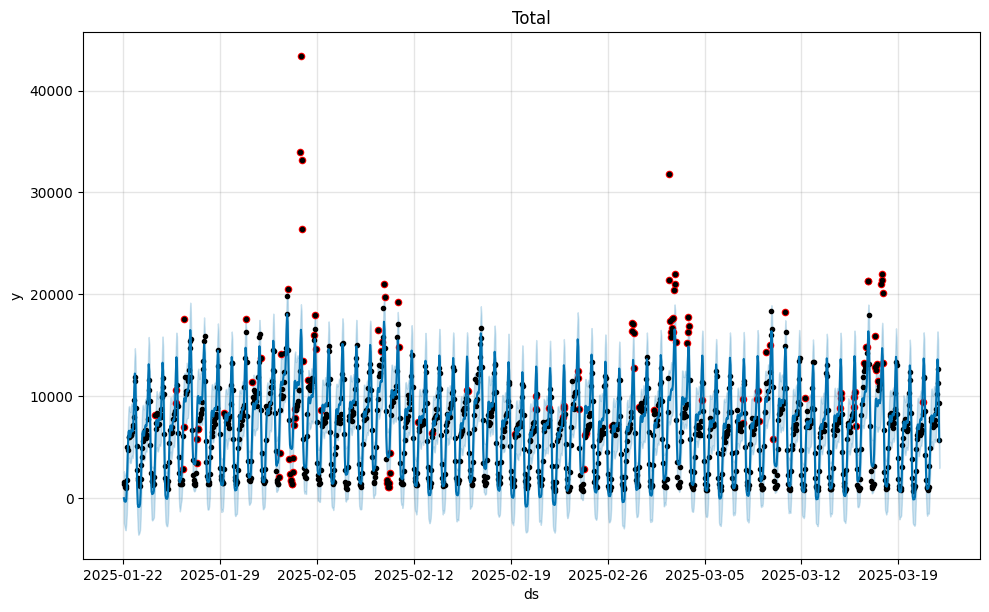

In [36]:
page_viewers_top_level = prophet_model(page_viewers, 'Total')
page_viewers_top_level

17:38:02 - cmdstanpy - INFO - Chain [1] start processing
17:38:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-556.585022,1508.625382,506.890521,772,0,265.109479,0.343406
1,2025-01-22 02:00:00,-631.186348,1342.676798,382.723869,595,0,212.276131,0.356767
2,2025-01-22 03:00:00,-669.543285,1363.650102,363.636058,552,0,188.363942,0.341239
3,2025-01-22 04:00:00,-649.800770,1328.046212,343.783439,438,0,94.216561,0.215106
4,2025-01-22 05:00:00,-596.856526,1472.524178,436.208753,509,0,72.791247,0.143008
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,2303.342150,4363.160642,3339.463273,2916,0,423.463273,0.145221
1411,2025-03-21 20:00:00,2706.270781,4801.952332,3731.735357,3522,0,209.735357,0.059550
1412,2025-03-21 21:00:00,2458.731945,4431.896842,3487.802193,3328,0,159.802193,0.048017
1413,2025-03-21 22:00:00,1578.711539,3667.411310,2597.925485,2830,0,232.074515,0.082005


<Figure size 3000x2000 with 0 Axes>

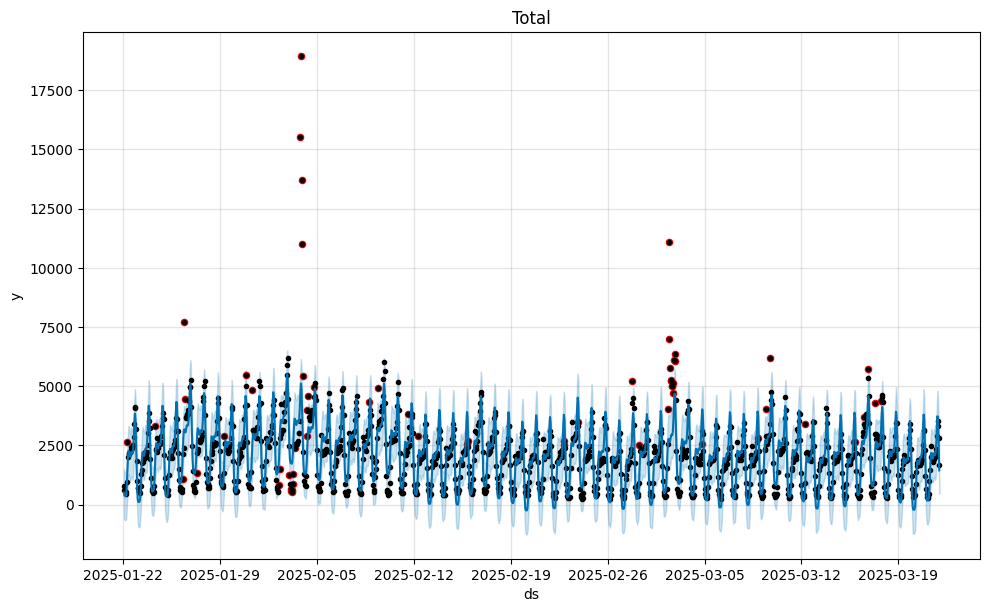

In [37]:
landing_page_viewers_top_level = prophet_model(landing_page_viewers, 'Total')
landing_page_viewers_top_level

17:38:02 - cmdstanpy - INFO - Chain [1] start processing
17:38:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-1013.886886,1119.519367,116.959765,830,0,713.040235,0.859085
1,2025-01-22 02:00:00,-1148.278729,951.966625,-34.320410,743,0,777.320410,1.046192
2,2025-01-22 03:00:00,-1197.356227,1119.591699,-7.415480,628,0,635.415480,1.011808
3,2025-01-22 04:00:00,-1140.616668,1057.486390,-34.522541,564,0,598.522541,1.061210
4,2025-01-22 05:00:00,-1055.257300,1096.782144,43.326036,628,0,584.673964,0.931009
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,4506.388052,6611.191092,5556.737660,4646,0,910.737660,0.196026
1411,2025-03-21 20:00:00,5125.539780,7353.439568,6256.516882,5892,0,364.516882,0.061866
1412,2025-03-21 21:00:00,4880.707204,7007.168993,5936.765863,5221,0,715.765863,0.137094
1413,2025-03-21 22:00:00,3390.926011,5592.804066,4531.147276,4476,0,55.147276,0.012321


<Figure size 3000x2000 with 0 Axes>

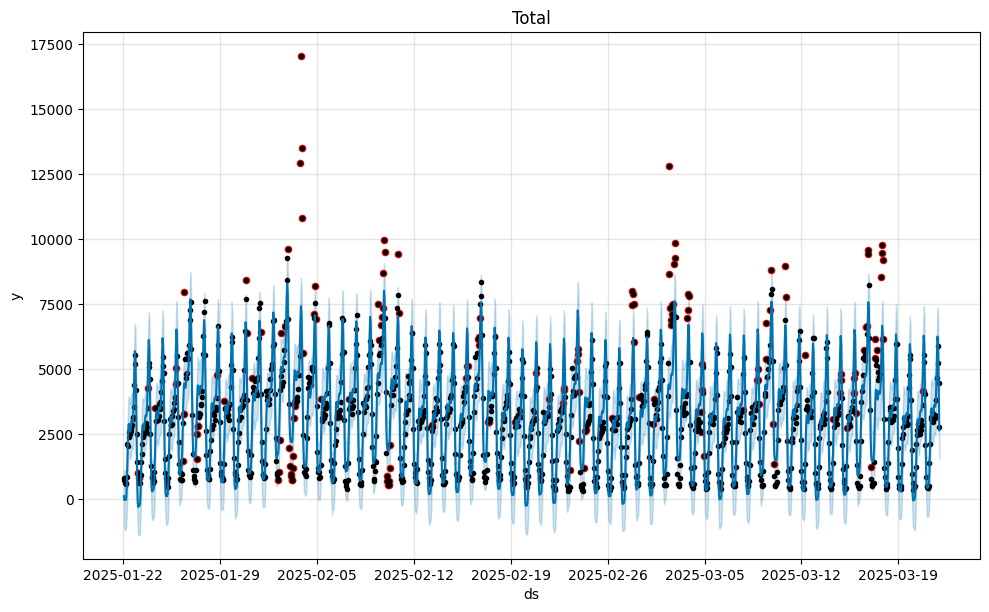

In [38]:
product_viewers_top_level = prophet_model(product_viewers, 'Total')
product_viewers_top_level

17:38:03 - cmdstanpy - INFO - Chain [1] start processing
17:38:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-651.410609,369.329565,-101.254186,211,0,312.254186,1.479878
1,2025-01-22 02:00:00,-623.928501,385.311314,-124.852906,170,0,294.852906,1.734429
2,2025-01-22 03:00:00,-623.154252,368.913172,-111.497212,93,0,204.497212,2.198895
3,2025-01-22 04:00:00,-620.175538,374.673344,-128.094227,129,0,257.094227,1.992979
4,2025-01-22 05:00:00,-652.445071,365.759034,-126.573402,118,0,244.573402,2.072656
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,965.525373,1988.809385,1462.427540,1309,0,153.427540,0.117210
1411,2025-03-21 20:00:00,1126.373889,2094.751206,1626.391823,1527,0,99.391823,0.065090
1412,2025-03-21 21:00:00,1024.435210,2061.297604,1539.829094,1390,0,149.829094,0.107791
1413,2025-03-21 22:00:00,687.350153,1711.715017,1181.016898,1171,0,10.016898,0.008554


<Figure size 3000x2000 with 0 Axes>

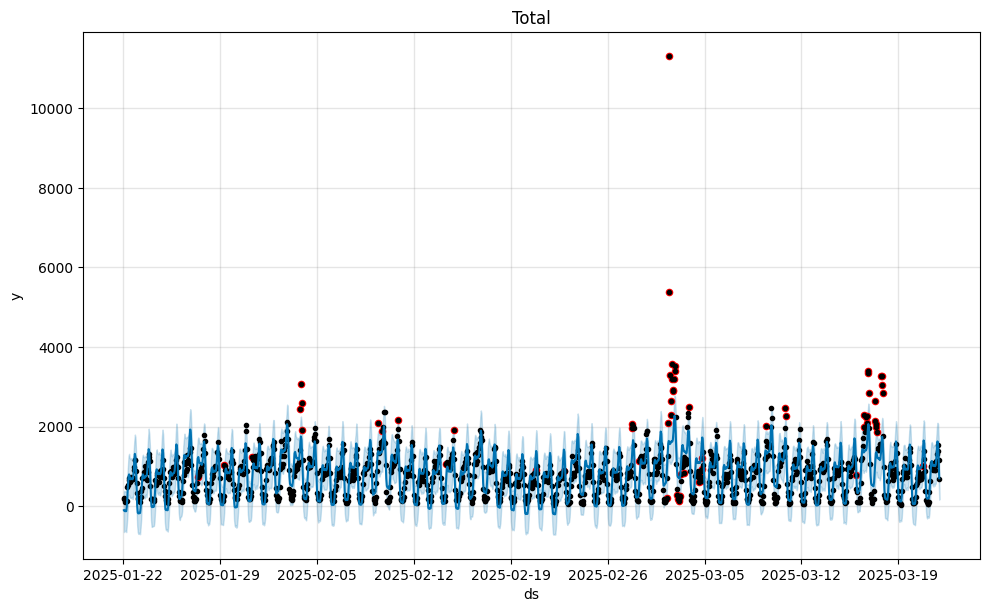

In [39]:
added_to_cart_top_level = prophet_model(added_to_cart, 'Total')
added_to_cart_top_level

17:38:03 - cmdstanpy - INFO - Chain [1] start processing
17:38:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-149.283724,77.293957,-35.429996,36,0,71.429996,1.984167
1,2025-01-22 02:00:00,-147.810633,63.685057,-42.549165,50,0,92.549165,1.850983
2,2025-01-22 03:00:00,-146.464741,68.576686,-38.557777,15,0,53.557777,3.570518
3,2025-01-22 04:00:00,-150.125053,66.388699,-40.748781,36,0,76.748781,2.131911
4,2025-01-22 05:00:00,-143.839651,66.075006,-35.167657,35,0,70.167657,2.004790
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,316.912430,532.413093,425.566936,362,0,63.566936,0.175599
1411,2025-03-21 20:00:00,360.111796,581.533904,466.816553,409,0,57.816553,0.141361
1412,2025-03-21 21:00:00,326.358706,538.952950,433.863879,381,0,52.863879,0.138750
1413,2025-03-21 22:00:00,217.068712,436.768256,324.213884,276,0,48.213884,0.174688


<Figure size 3000x2000 with 0 Axes>

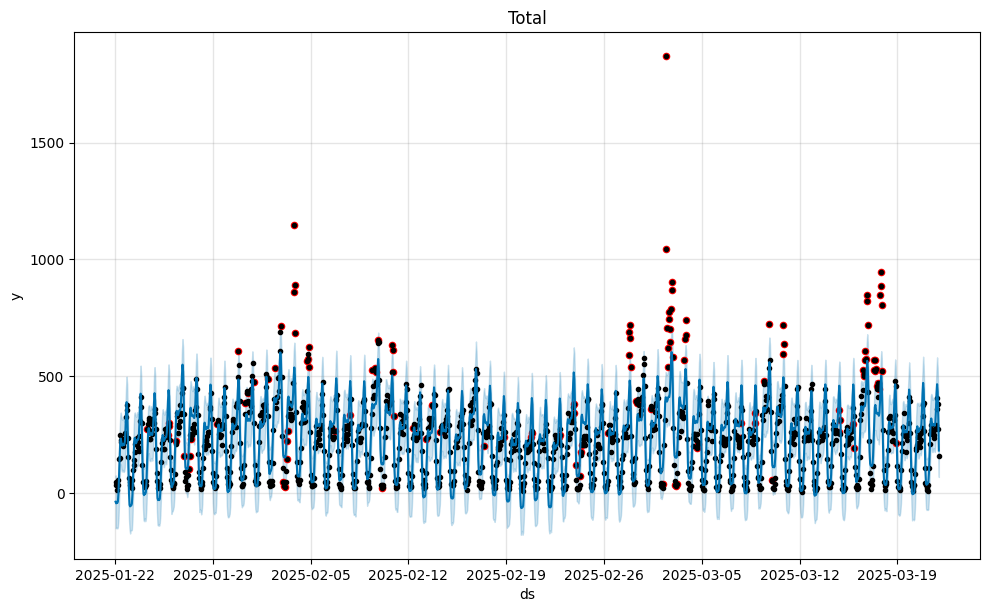

In [40]:
checkout_started_top_level = prophet_model(checkout_started, 'Total')
checkout_started_top_level

17:38:03 - cmdstanpy - INFO - Chain [1] start processing
17:38:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-518.356058,1505.378704,479.849054,773,0,293.150946,0.379238
1,2025-01-22 02:00:00,-653.843157,1391.522312,355.974441,595,0,239.025559,0.401724
2,2025-01-22 03:00:00,-649.734523,1381.035823,337.242725,552,0,214.757275,0.389053
3,2025-01-22 04:00:00,-667.494168,1365.819526,317.547083,438,0,120.452917,0.275007
4,2025-01-22 05:00:00,-640.279230,1431.305014,410.172454,510,0,99.827546,0.195740
...,...,...,...,...,...,...,...,...
1410,2025-03-21 19:00:00,2314.787401,4381.583599,3341.397301,2923,0,418.397301,0.143140
1411,2025-03-21 20:00:00,2774.143792,4709.961663,3734.207959,3534,0,200.207959,0.056652
1412,2025-03-21 21:00:00,2546.087446,4485.148879,3489.860896,3332,0,157.860896,0.047377
1413,2025-03-21 22:00:00,1591.113533,3590.616239,2598.534847,2835,0,236.465153,0.083409


<Figure size 3000x2000 with 0 Axes>

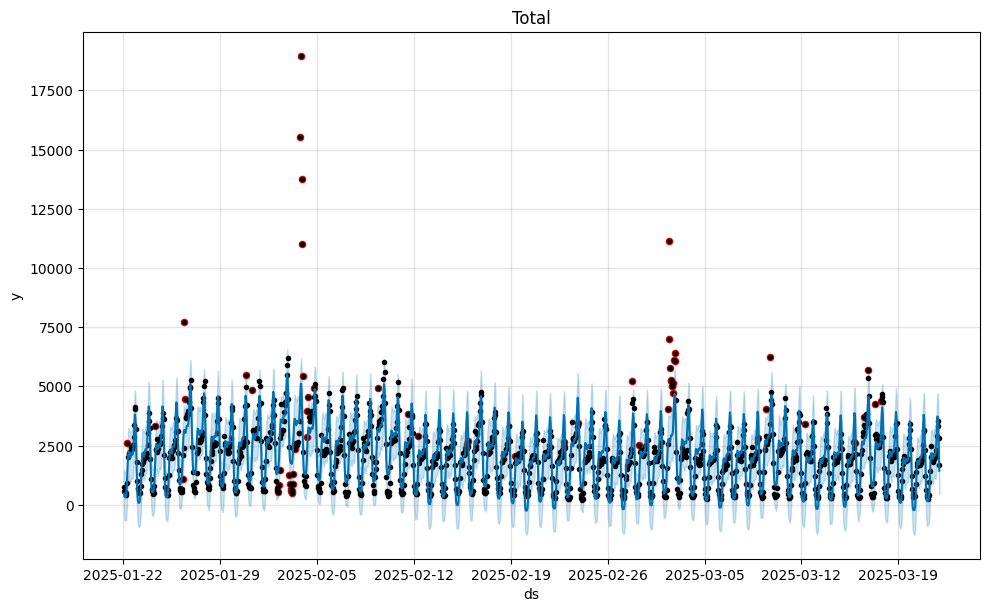

In [41]:
visitors_top_level = prophet_model(visitors, 'Total')
visitors_top_level

17:38:04 - cmdstanpy - INFO - Chain [1] start processing
17:38:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-43.115293,10.801507,-14.476093,5,0,19.476093,3.895219
1,2025-01-22 02:00:00,-41.268787,11.636756,-14.966972,8,0,22.966972,2.870872
2,2025-01-22 03:00:00,-39.680681,15.561383,-13.384446,5,0,18.384446,3.676889
3,2025-01-22 04:00:00,-42.695435,15.141933,-14.830044,4,0,18.830044,4.707511
4,2025-01-22 05:00:00,-42.881038,14.438287,-14.659097,3,0,17.659097,5.886366
...,...,...,...,...,...,...,...,...
1409,2025-03-21 19:00:00,105.590587,161.690424,133.173709,123,0,10.173709,0.082713
1410,2025-03-21 20:00:00,114.852851,171.845863,143.243136,121,0,22.243136,0.183828
1411,2025-03-21 21:00:00,104.602119,160.328713,132.062369,127,0,5.062369,0.039861
1412,2025-03-21 22:00:00,72.156359,125.464017,99.515790,84,0,15.515790,0.184712


<Figure size 3000x2000 with 0 Axes>

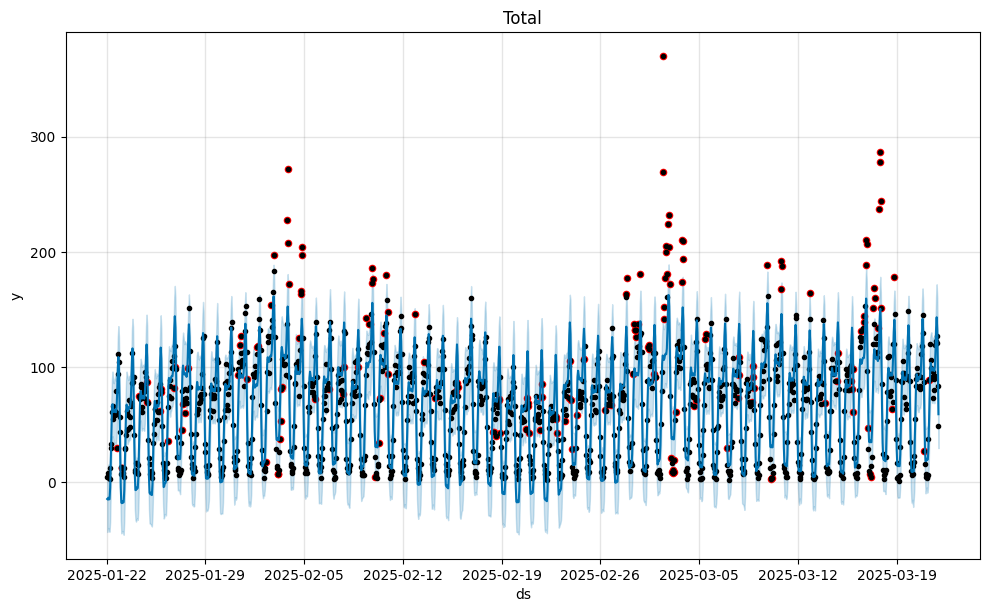

In [42]:
orders_top_level = prophet_model(orders, 'Total')
orders_top_level

17:38:04 - cmdstanpy - INFO - Chain [1] start processing
17:38:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat_lower,yhat_upper,yhat,y,is_anomaly,diff,percent_diff
0,2025-01-22 01:00:00,-38.184981,12.479817,-12.940637,5,0,17.940637,3.588127
1,2025-01-22 02:00:00,-36.888142,14.754753,-13.300558,8,0,21.300558,2.662570
2,2025-01-22 03:00:00,-36.977311,15.006029,-11.765595,5,0,16.765595,3.353119
3,2025-01-22 04:00:00,-37.370687,12.560344,-13.169861,4,0,17.169861,4.292465
4,2025-01-22 05:00:00,-39.727797,13.891241,-13.011322,3,0,16.011322,5.337107
...,...,...,...,...,...,...,...,...
1409,2025-03-21 19:00:00,100.811640,152.350148,125.571935,110,0,15.571935,0.141563
1410,2025-03-21 20:00:00,109.794467,162.081211,135.660598,113,0,22.660598,0.200536
1411,2025-03-21 21:00:00,101.158581,151.465723,125.220187,123,0,2.220187,0.018050
1412,2025-03-21 22:00:00,67.640803,117.196657,94.178341,80,0,14.178341,0.177229


<Figure size 3000x2000 with 0 Axes>

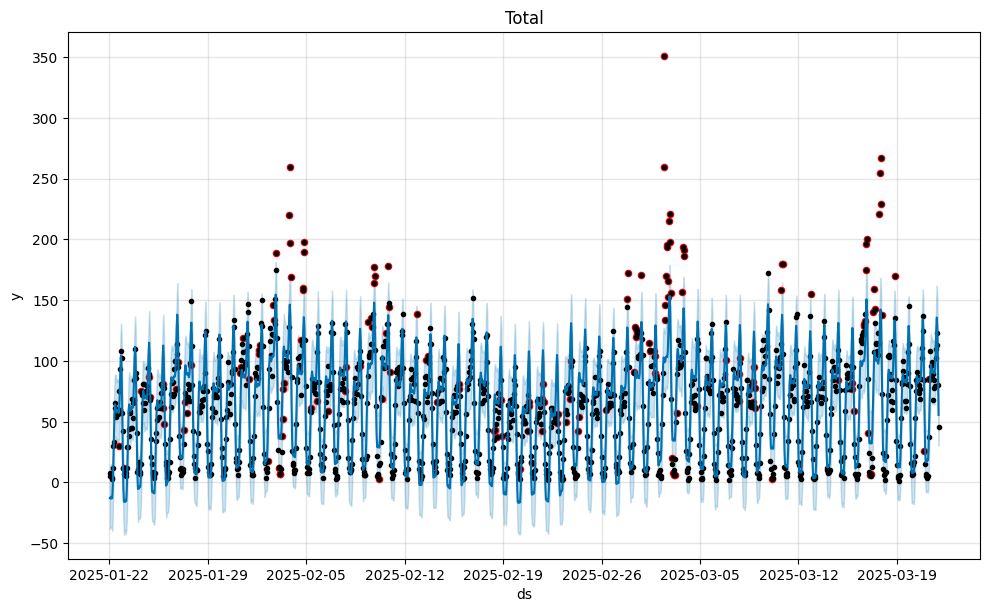

In [43]:
buyers_top_level = prophet_model(buyers, 'Total')
buyers_top_level

In [44]:
# Create a DataFrame with all hours and anomalies
all_hours = pd.date_range(start='2025-01-22 01:00:00', end='2025-03-21 23:00:00', freq='H')
anomaly_df = pd.DataFrame({'hour': all_hours})

# Add anomaly information from each model
models = {
    'page_viewers': page_viewers_top_level,
    'landing_page_viewers': landing_page_viewers_top_level,
    'product_viewers': product_viewers_top_level,
    'added_to_cart': added_to_cart_top_level,
    'checkout_started': checkout_started_top_level,
    'visitors': visitors_top_level,
    'orders': orders_top_level,
    'buyers': buyers_top_level
}

# For each model, add a column indicating if there was an anomaly
for model_name, model_data in models.items():
    # Ensure the data length matches the DataFrame length
    if len(model_data['is_anomaly']) < len(anomaly_df):
        # Pad with zeros (assuming no anomaly) for the missing values
        padded_data = np.pad(model_data['is_anomaly'], (0, len(anomaly_df) - len(model_data['is_anomaly'])), 
                           mode='constant', constant_values=0)
        anomaly_df[f'{model_name}_anomaly'] = padded_data
    else:
        anomaly_df[f'{model_name}_anomaly'] = model_data['is_anomaly'].values

# Create a single column with list of event names that had anomalies at each hour
anomaly_df['event_names'] = anomaly_df.apply(
    lambda row: [metric for metric in models.keys() if row[f'{metric}_anomaly'] == 1],
    axis=1
)

# Drop the individual anomaly columns since we only need the event_names
anomaly_df = anomaly_df[['hour', 'event_names']]

# Display the first few rows of the combined DataFrame
anomaly_df

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_83767/2502242580.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  all_hours = pd.date_range(start='2025-01-22 01:00:00', end='2025-03-21 23:00:00', freq='H')


,hour,event_names
0,2025-01-22 01:00:00,[]
1,2025-01-22 02:00:00,[]
2,2025-01-22 03:00:00,[]
3,2025-01-22 04:00:00,[]
4,2025-01-22 05:00:00,[]
...,...,...
1410,2025-03-21 19:00:00,[]
1411,2025-03-21 20:00:00,[]
1412,2025-03-21 21:00:00,[]
1413,2025-03-21 22:00:00,[]


In [45]:
!pip install plotly
!pip install plotly-express
!pip install mplcursors

In [46]:
!pip install --upgrade nbformat

In [62]:
def plot_visitors_anomalies(anomaly_df, visitors_df, start_date, end_date):
    """
    Plot visitors and anomalies for a date range.
    
    Parameters:
    -----------
    anomaly_df : pandas DataFrame
        DataFrame containing anomaly information with 'hour' and 'event_names' columns
    visitors_df : pandas DataFrame
        DataFrame containing visitor information with 'ds' and 'y' columns
    start_date : str or datetime
        The start date (e.g., '2025-02-15')
    end_date : str or datetime
        The end date (e.g., '2025-02-16')
    """
    import plotly.express as px
    
    # Convert dates to datetime if they're strings
    start_time = pd.to_datetime(start_date).replace(hour=0, minute=0, second=0)
    end_time = pd.to_datetime(end_date).replace(hour=23, minute=59, second=59)
    
    # Filter data for the date range
    filtered_visitors = visitors_df[
        (visitors_df['ds'] >= start_time) & 
        (visitors_df['ds'] <= end_time)
    ].copy()
    
    filtered_anomalies = anomaly_df[
        (anomaly_df['hour'] >= start_time) & 
        (anomaly_df['hour'] <= end_time)
    ].copy()
    
    # Create the figure
    fig = px.line(filtered_visitors, x='ds', y='y',
                  title=f"Visitors and Anomalies from {start_time.strftime('%Y-%m-%d')} to {end_time.strftime('%Y-%m-%d')}",
                  labels={"y": "Number of Visitors", "ds": "Time"})
    
    # Add highlighted regions for hours with anomalies
    for idx, row in filtered_anomalies.iterrows():
        if row['event_names']:  # If there are any anomalies in this hour
            fig.add_vrect(
                x0=row['hour'] - pd.Timedelta(hours=0.5),
                x1=row['hour'] + pd.Timedelta(hours=0.5),
                fillcolor="red",
                opacity=0.3,
                line_width=0
            )
    
    # Update layout
    fig.update_layout(
        xaxis_title="Time",
        yaxis_title="Number of Visitors",
        hovermode="x unified",
        showlegend=False
    )
    
    # Update hover template
    fig.update_traces(
        hovertemplate="<b>Time:</b> %{x}<br>" +
                      "<b>Visitors:</b> %{y:,.0f}<br>" +
                      "<b>Anomalies:</b> %{customdata}<extra></extra>",
        customdata=filtered_anomalies['event_names']
    )
    
    # Show the figure
    fig.show()

# Example usage:
plot_visitors_anomalies(anomaly_df, visitors_top_level, '2025-02-15', '2025-02-17')

In [47]:
import plotly.express as px

# Create a Plotly figure for total visitors
fig = px.line(visitors_top_level, x='ds', y='y',
              title="Total Visitors Over Time with Anomalies",
              labels={"y": "Number of Visitors", "ds": "Time"})

# Add highlighted regions for hours with anomalies
for idx, row in anomaly_df.iterrows():
    if row['event_names']:  # If there are any anomalies in this hour
        fig.add_vrect(x0=row['hour'] - pd.Timedelta(hours=0.5), 
                     x1=row['hour'] + pd.Timedelta(hours=0.5),
                     fillcolor="red", 
                     opacity=0.3, 
                     line_width=0)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Number of Visitors",
    hovermode="x unified",
    showlegend=False
)

# Update hover template to show anomaly information
fig.update_traces(
    hovertemplate="<b>Time:</b> %{x}<br>" +
                  "<b>Visitors:</b> %{y}<br>" +
                  "<b>Anomalies:</b> %{customdata}<extra></extra>",
    customdata=anomaly_df['event_names']
)

# Show the figure
fig.show()

In [48]:
# Check lengths of each model's data
print("Length of all_hours:", len(all_hours))
for model_name, model_data in models.items():
    print(f"Length of {model_name}:", len(model_data['is_anomaly']))

Length of all_hours: 1415
Length of page_viewers: 1415
Length of landing_page_viewers: 1415
Length of product_viewers: 1415
Length of added_to_cart: 1415
Length of checkout_started: 1415
Length of visitors: 1415
Length of orders: 1414
Length of buyers: 1414


## Anomaly Contributions

In [49]:
# def anomaly_contribution(site_visits_top_level,site_visits_bottom_level, dimension_list):
#   site_visits_top_level_new = site_visits_top_level.copy()
#   site_visits_top_level_new["pred added"] = 0
#   site_visits_top_level_new["diff added"] = 0
#   site_visits_top_level_new["diff sign added"] = 0

#   for dimension in dimension_list:
#     data_curr = prophet_model(site_visits_bottom_level, dimension)
#     site_visits_top_level_new["pred "+dimension] = data_curr['yhat']
#     site_visits_top_level_new["diff "+dimension] = data_curr['diff']
#     site_visits_top_level_new['percent_diff ' + dimension] = data_curr['percent_diff']


#     #Aggregated anomaly weights by dimension for verification with total anomaly weight found at top level
#     site_visits_top_level_new["pred added"] += site_visits_top_level_new["pred "+dimension]
#     site_visits_top_level_new["diff added"] += site_visits_top_level_new["diff "+dimension]


#   for dimension in dimension_list:
#     site_visits_top_level_new["perc diff "+dimension] = site_visits_top_level_new["diff "+dimension]/site_visits_top_level_new["diff added"]
#     print(dimension + " added!")
#   return site_visits_top_level_new

In [50]:
# def anomaly_percents(site_visits_top_levell,site_visits_bottom_level, geo_list):
#   site_visits_top_level_new = site_visits_top_levell.copy()
#   for geo in geo_list:
#     data_curr = prophet_model(site_visits_bottom_level, geo)
#     # site_visits_top_level_new["diff "+geo] = data_curr['diff']
#     site_visits_top_level_new["percent_diff "+geo] = data_curr['percent_diff']
#   return site_visits_top_level_new

In [51]:
# geo_list = ["Global", "US"]
# visitors_contributions = anomaly_percents(visitors_top_level,visitors_by_geography, geo_list)
# visitors_geo_contributions = visitors_contributions[visitors_contributions["is_anomaly"] == 1]
# visitors_geo_contributions.head()

In [52]:
# orders_contributions = anomaly_percents(orders_top_level,orders_by_geography, geo_list)
# orders_geo_contributions = orders_contributions[orders_contributions["is_anomaly"] == 1]
# orders_geo_contributions.head()

In [53]:
# buyers_contributions = anomaly_percents(buyers_top_level,buyers_by_geography, geo_list)
# buyers_geo_contributions = buyers_contributions[buyers_contributions["is_anomaly"] == 1]
# buyers_geo_contributions.head()

In [54]:
# devices = ["Android",	"Linux", "macOS",	"Other",	"Windows",	"iOS"]

In [55]:
# visitors_contribution_dev = anomaly_contribution(visitors_top_level,visitors_by_device, devices)
# visitors_contributions_device = visitors_contribution_dev[visitors_contribution_dev["is_anomaly"] == 1]
# visitors_contributions_device.head()

In [56]:
# orders_contribution_dev = anomaly_contribution(orders_top_level, orders_by_device, devices)
# orders_contributions_device = orders_contribution_dev[orders_contribution_dev["is_anomaly"] == 1]
# orders_contributions_device.head()

In [57]:
# buyers_contribution_dev = anomaly_contribution(buyers_top_level, buyers_by_device, devices)
# buyers_contributions_device = buyers_contribution_dev[buyers_contribution_dev["is_anomaly"] == 1]
# buyers_contributions_device.head()

In [58]:
# visitors_anomaly_percentages_device = visitors_contributions_device.set_index('ds')[["percent_diff "+device for device in devices]]
# visitor_anomaly_percentages_geo = visitors_geo_contributions.set_index('ds')[["percent_diff Global", "percent_diff US"]]
# visitor_anomaly_percentages_geo

In [59]:
# from sklearn.cluster import DBSCAN
# from sklearn.neighbors import NearestNeighbors
# from kneed import KneeLocator
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# def find_eps(df):
#   nn = NearestNeighbors(n_neighbors=8).fit(df)
#   distances, indices = nn.kneighbors(df)
#   distances = np.sort(distances, axis=0)
#   distances = distances[:,1]
#   kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
#   kneedle.plot_knee()
#   return distances[kneedle.elbow]

# def find_maximum_contributors(df, index, eps):
#   reshaped_row = np.array(df.iloc[index].to_list()).reshape(-1, 1)
#   db = DBSCAN(eps=eps*0.5, min_samples=1).fit(reshaped_row)
#   labels = db.labels_
#   clusters = {}
#   for label in set(labels):
#     clusters[label] = reshaped_row[labels == label]
#   sorted_clusters = {k: clusters[k] for k in sorted(clusters, key=lambda k: max(clusters[k]), reverse=True)}
#   max_contributors = sorted_clusters[list(sorted_clusters.keys())[0]]
#   if len(sorted_clusters.keys()) == 1:
#     return
#   contributing_columns = []
#   for val in max_contributors:
#     col_index = list(reshaped_row).index(val)
#     contributing_columns.append(df.columns[col_index])
#   return contributing_columns

# def create_contributor_col(df):
#   df = df.fillna(0)
#   eps = find_eps(df)
#   contribution_list = []
#   for i in range(df.shape[0]):
#     contribution_list.append(find_maximum_contributors(df, i, eps))
#   df['Contributors'] = contribution_list
#   return df

In [60]:
# visitor_device_contributing_columns = create_contributor_col(visitors_anomaly_percentages_device)
# visitor_device_contributing_columns.reset_index(inplace=True)
# visitor_device_contributing_columns.head()